In [2]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# get a direct reference to the mob model
ans = models["Ans"]

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.4 sec. Average model step in 0.0285 ms.


In [3]:
neo.fastforward(360)

 Ready in 17.9 sec. Average model step in 0.0248 ms.


In [4]:
neo.analyze_heart()


LA_LV.flow      : net  236.47267, forward  236.47267, backward        0.0 ml/kg/min, stroke volume:    1.70123 ml/kg, 
RA_RV.flow      : net  236.49271, forward  236.49271, backward        0.0 ml/kg/min, stroke volume:    1.70137 ml/kg, 
RV_PA.flow      : net  236.50254, forward  236.50254, backward        0.0 ml/kg/min, stroke volume:    1.70144 ml/kg, 
LV_AA.flow      : net  236.54751, forward  236.54751, backward        0.0 ml/kg/min, stroke volume:    1.70177 ml/kg, 
IVCI_RA.flow    : net   130.7699, forward  137.46253, backward   -6.69263 ml/kg/min, stroke volume:    0.94078 ml/kg, 
SVC_RA.flow     : net  103.06182, forward   109.9162, backward   -6.85438 ml/kg/min, stroke volume:    0.74145 ml/kg, 
LA.pres_in      : max   10.59493, min    3.15645 mmHg
RA.pres_in      : max   10.58262, min    2.72125 mmHg
LV.pres_in      : max   75.91567, min    2.45544 mmHg
RV.pres_in      : max   44.24242, min    1.42308 mmHg
AA.pres_in      : max   75.58972, min   49.25602 mmHg
IVCI.pres_in   

In [6]:
neo.get_bloodgas("AA")

{'ph': 7.400539730386531,
 'po2': 99.2542199136339,
 'pco2': 42.36694661219435,
 'hco3': 25.958564474505966,
 'be': 0.7120835730770425,
 'so2': 97.8942715468241}

In [7]:
neo.get_vitals()


AA.pres_in      : max   75.50988, min   49.28902 mmHg
PA.pres_in      : max   43.73095, min   23.28009 mmHg
IVCI.pres_in    : max    8.87596, min    5.59537 mmHg


{'heartrate': 139.33631010949773,
 'spo2_pre': 97.87607916167318,
 'spo2_post': 97.59636029321696,
 'abp_systole': 75.50988,
 'abp_diastole': 49.28902,
 'pap_systole': 43.73095,
 'pap_diastole': 23.28009,
 'cvp': 6.688790646999999,
 'resp_rate': 41.17994324478927,
 'pH': 7.400036893708846,
 'po2': 98.96398015119765,
 'pco2': 42.41911088641906,
 'hco3': 25.96045089264579,
 'be': 0.7029136758524687}

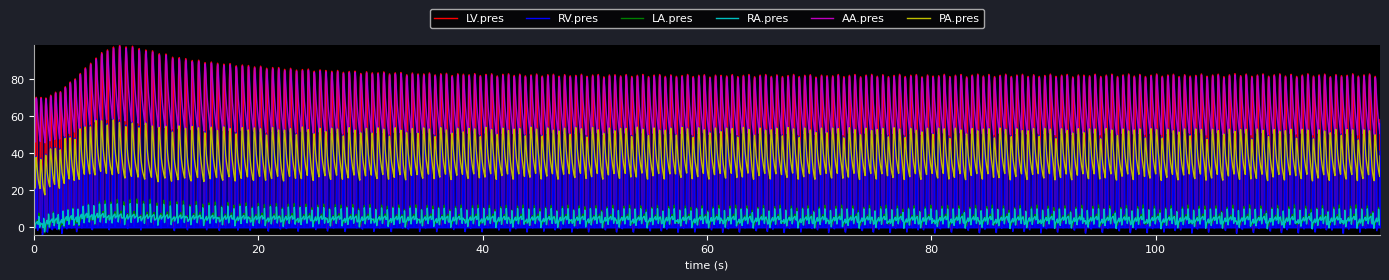

In [8]:
models["Fluids"].add_volume(vol=75)
neo.plot_heart_pressures(time_to_calculate=120)